# Stereo Rectification with a Tetrahedon

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Init the camereas and the tetrahedon

In [4]:
# set camera angles
theta_2 = -1/18*np.pi #-1/3 #1/5
c_2 = np.cos(theta_2)
s_2 = np.sin(theta_2)
theta_1 = 0/6*np.pi #-1/3 #1/5
c_1 = np.cos(theta_1)
s_1 = np.sin(theta_1)
T_x = -1 #-10 #-5

In [5]:
# set camera positions
C1 = np.array([
    [c_1,0,s_1,0],
    [0,1,0,0],
    [-s_1,0,c_1,0],
    [0,0,0,1],
])
C2 = np.array([
    [c_2,0,s_2,T_x],
    [0,1,0,0],
    [-s_2,0,c_2,0],
    [0,0,0,1],
])
R_C2 = np.array([
    [c_2,0,s_2],
    [0,1,0],
    [-s_2,0,c_2]
])
T_C2 = np.array([
    [T_x],
    [0],
    [0]
])

In [6]:
C2

array([[ 0.98480775,  0.        , -0.17364818, -1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.17364818,  0.        ,  0.98480775,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [7]:
# initialise tetrahedon
T_a = np.array([
    [0],
    [-1],
    [5],
    [1]
])
T_b = np.array([
    [0.5],
    [-1],
    [5.866],
    [1]
])
T_c = np.array([
    [-0.5],
    [-1],
    [5.866],
    [1]
])
T_d = np.array([
    [0],
    [-1.866],
    [5.433],
    [1]
])
T = np.array([T_a, T_b, T_c, T_d])
T1 = np.array([T_a, T_c, T_b, T_d])
T2 = np.array([T_d, T_b, T_c, T_a])

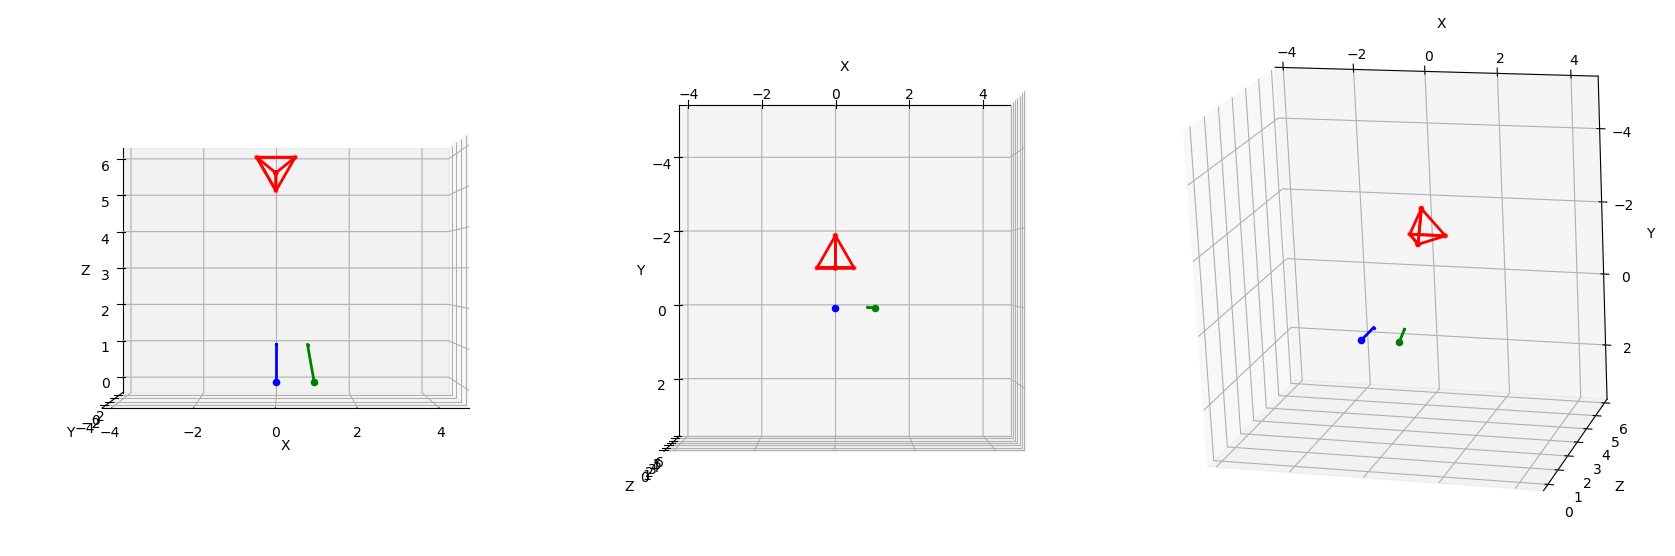

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(17,10),subplot_kw=dict(projection='3d'))
linewidth = 2
plt.rcParams['font.size'] = '15'
axs[0].scatter(T[:,0], T[:,1], T[:,2],c='r',s=10)

axs[0].plot(np.roll(T[:,0],0), np.roll(T[:,1],0), np.roll(T[:,2],0), color='r', linewidth=linewidth)
axs[0].plot(np.roll(T1[:,0],1), np.roll(T1[:,1],1), np.roll(T1[:,2],1), color='r', linewidth=linewidth)
axs[0].plot(np.roll(T2[:,0],2), np.roll(T2[:,1],2), np.roll(T2[:,2],2), color='r', linewidth=linewidth)

axs[0].scatter(0,0,0,c='b',s=20)
axs[0].scatter(0,0,1,c='b',s=2)
axs[0].plot([0,0],[0,0],[0,1],c='b', linewidth=linewidth)


axs[0].scatter(-T_x,0,0,c='g',s=20)
axs[0].scatter(-T_x-np.sin(-theta_2),0,np.cos(-theta_2),c='g',s=2)
axs[0].plot([-T_x,-T_x-np.sin(-theta_2)],[0,0],[0,np.cos(-theta_2)],c='g', linewidth=linewidth)

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Z')
axs[0].axis('equal')
axs[0].view_init(0, -90, 0)


axs[1].scatter(T[:,0], T[:,1], T[:,2],c='r',s=10)

axs[1].plot(np.roll(T[:,0],0), np.roll(T[:,1],0), np.roll(T[:,2],0), color='r', linewidth=linewidth)
axs[1].plot(np.roll(T1[:,0],1), np.roll(T1[:,1],1), np.roll(T1[:,2],1), color='r', linewidth=linewidth)
axs[1].plot(np.roll(T2[:,0],2), np.roll(T2[:,1],2), np.roll(T2[:,2],2), color='r', linewidth=linewidth)

axs[1].scatter(0,0,0,c='b',s=20)
axs[1].scatter(0,0,1,c='b',s=2)
axs[1].plot([0,0],[0,0],[0,1],c='b', linewidth=linewidth)


axs[1].scatter(-T_x,0,0,c='g',s=20)
axs[1].scatter(-T_x-np.sin(-theta_2),0,np.cos(-theta_2),c='g',s=2)
axs[1].plot([-T_x,-T_x-np.sin(-theta_2)],[0,0],[0,np.cos(-theta_2)],c='g', linewidth=linewidth)

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Z')
axs[1].axis('equal')
axs[1].view_init(-90, -45, -45)

axs[2].scatter(T[:,0], T[:,1], T[:,2],c='r',s=10)
axs[2].plot(np.roll(T[:,0],0), np.roll(T[:,1],0), np.roll(T[:,2],0), color='r', linewidth=linewidth)
axs[2].plot(np.roll(T1[:,0],1), np.roll(T1[:,1],1), np.roll(T1[:,2],1), color='r', linewidth=linewidth)
axs[2].plot(np.roll(T2[:,0],2), np.roll(T2[:,1],2), np.roll(T2[:,2],2), color='r', linewidth=linewidth)

axs[2].scatter(0,0,0,c='b',s=20)
axs[2].scatter(0,0,1,c='b',s=2)
axs[2].plot([0,0],[0,0],[0,1],c='b', linewidth=linewidth)


axs[2].scatter(-T_x,0,0,c='g',s=20)
axs[2].scatter(-T_x-np.sin(-theta_2),0,np.cos(-theta_2),c='g',s=2)
axs[2].plot([-T_x,-T_x-np.sin(-theta_2)],[0,0],[0,np.cos(-theta_2)],c='g', linewidth=linewidth)

axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].set_zlabel('Z')
axs[2].axis('equal')
axs[2].view_init(-65, -45, -45)

plt.tight_layout()
plt.savefig('images/1.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Compute the projection matrix and plot picture

In [9]:
f = 1
P_p = np.array([
    [f,0,0,0],
    [0,f,0,0],
    [0,0,1,0]
])

In [10]:
C1_T_a = np.matmul(P_p, np.matmul(C1, T_a))
C1_T_b = np.matmul(P_p, np.matmul(C1, T_b))
C1_T_c = np.matmul(P_p, np.matmul(C1, T_c))
C1_T_d = np.matmul(P_p, np.matmul(C1, T_d))
C1_T = np.array([C1_T_a, C1_T_b, C1_T_c, C1_T_d])
C1_T_ = np.array([C1_T_a, C1_T_c, C1_T_b, C1_T_d])
C1_T__ = np.array([C1_T_a, C1_T_d, C1_T_c, C1_T_b])

In [11]:
C1_T

array([[[ 0.   ],
        [-1.   ],
        [ 5.   ]],

       [[ 0.5  ],
        [-1.   ],
        [ 5.866]],

       [[-0.5  ],
        [-1.   ],
        [ 5.866]],

       [[ 0.   ],
        [-1.866],
        [ 5.433]]])

In [12]:
C2_T_a = np.matmul(P_p, np.matmul(C2, T_a))
C2_T_b = np.matmul(P_p, np.matmul(C2, T_b))
C2_T_c = np.matmul(P_p, np.matmul(C2, T_c))
C2_T_d = np.matmul(P_p, np.matmul(C2, T_d))
C2_T = np.array([C2_T_a, C2_T_b, C2_T_c, C2_T_d])
C2_T_ = np.array([C2_T_a, C2_T_c, C2_T_b, C2_T_d])
C2_T__ = np.array([C2_T_a, C2_T_d, C2_T_c, C2_T_b])

In [13]:
C2_T

array([[[-1.86824089],
        [-1.        ],
        [ 4.92403877]],

       [[-1.52621633],
        [-1.        ],
        [ 5.86370637]],

       [[-2.51102409],
        [-1.        ],
        [ 5.69005819]],

       [[-1.94343055],
        [-1.866     ],
        [ 5.35046052]]])

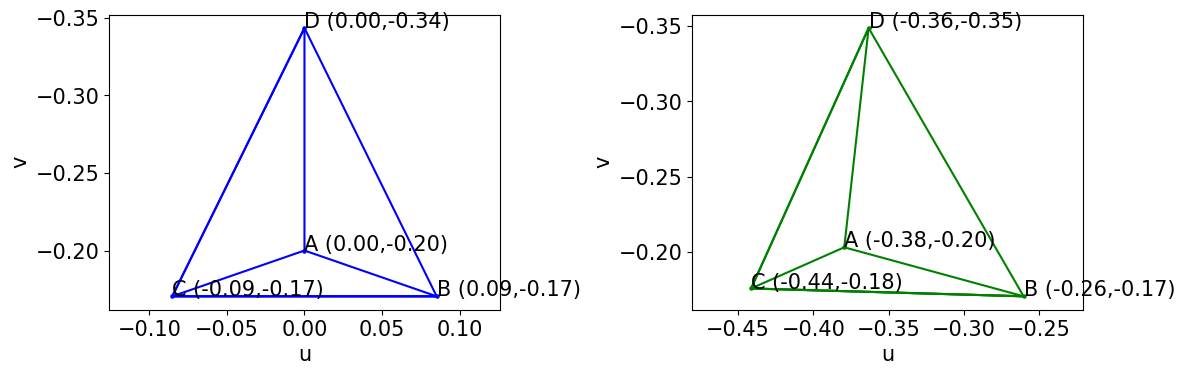

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
#plt.rcParams['font.size'] = '10'
axs[0].scatter(C1_T[:,0]/C1_T[:,2], C1_T[:,1]/C1_T[:,2],c='b',s=5)
for i,label in enumerate(['A','B','C','D']):
    axs[0].annotate(f'{label} ({(C1_T[:,0]/C1_T[:,2])[i][0]:.2f},{(C1_T[:,1]/C1_T[:,2])[i][0]:.2f})', ((C1_T[:,0]/C1_T[:,2])[i],(C1_T[:,1]/C1_T[:,2])[i]))
axs[0].plot(C1_T[:,0]/C1_T[:,2], C1_T[:,1]/C1_T[:,2],c='b')
axs[0].plot(C1_T_[:,0]/C1_T_[:,2], C1_T_[:,1]/C1_T_[:,2],c='b')
axs[0].plot(C1_T__[:,0]/C1_T__[:,2], C1_T__[:,1]/C1_T__[:,2],c='b')
axs[0].invert_yaxis()
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].axis('equal')

axs[1].scatter(C2_T[:,0]/C2_T[:,2], C2_T[:,1]/C2_T[:,2],c='g',s=5)
for i,label in enumerate(['A','B','C','D']):
    axs[1].annotate(f'{label} ({(C2_T[:,0]/C2_T[:,2])[i][0]:.2f},{(C2_T[:,1]/C2_T[:,2])[i][0]:.2f})', ((C2_T[:,0]/C2_T[:,2])[i],(C2_T[:,1]/C2_T[:,2])[i]))
axs[1].plot(C2_T[:,0]/C2_T[:,2], C2_T[:,1]/C2_T[:,2],c='g')
axs[1].plot(C2_T_[:,0]/C2_T_[:,2], C2_T_[:,1]/C2_T_[:,2],c='g')
axs[1].plot(C2_T__[:,0]/C2_T__[:,2], C2_T__[:,1]/C2_T__[:,2],c='g')
axs[1].invert_yaxis()
axs[1].set_xlabel('u')
axs[1].set_ylabel('v')
axs[1].axis('equal')
#axs[1].set_ylim(-0.2, -0.6)

plt.tight_layout()
plt.gcf().savefig('images/2.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Compute the epipoles

In [15]:
def compute_epipole(F):
    '''
    Compute epipole using the fundamental matrix.
    pass F.T as argument to compute the other epipole
    '''
    U, S, V = np.linalg.svd(F)
    e = V[-1, :]
    e = e / e[2]
    return e

In [16]:
def get_cross_product_matrix(vector):
    '''
    The cross product of two vectors can be represented as a matrix multiplication.
    a x b = [a']b,
    where 
    a = [a1, a2, a3] and
    a' = [[0, -a3, a2],
          [a3, 0, -a1],
          [-a2, a1, 0]]
    '''
    A = np.zeros((3, 3))
    a1, a2, a3 = vector
    A[0][1] = -a3
    A[0][2] = a2
    A[1][0] = a3
    A[1][2] = -a1
    A[2][0] = -a2
    A[2][1] = a1
    
    return A

In [18]:
T_x = get_cross_product_matrix(T_C2)

In [19]:
T_x

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0., -1.,  0.]])

In [20]:
R_C2

array([[ 0.98480775,  0.        , -0.17364818],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.17364818,  0.        ,  0.98480775]])

In [21]:
E = np.matmul(T_x, R_C2)

In [22]:
E

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.17364818,  0.        ,  0.98480775],
       [ 0.        , -1.        ,  0.        ]])

In [23]:
U, S, V = np.linalg.svd(E)

In [24]:
V

array([[-0.        , -1.        ,  0.        ],
       [-0.17364818,  0.        , -0.98480775],
       [-0.98480775,  0.        ,  0.17364818]])

In [25]:
e = V[-1, :]
    

In [26]:
e/1/0.17

array([-5.79298678,  0.        ,  1.02145987])

In [27]:
e = e / e[2]

In [28]:
epipole_2 = compute_epipole(E)

In [29]:
epipole_2

array([-5.67128182,  0.        ,  1.        ])

In [30]:
epipole_1 = compute_epipole(E.T)

/var/folders/lb/1wyxzsf55z7c6gkffpb6jgx00000gn/T/ipykernel_26763/3712844384.py:8: RuntimeWarning: divide by zero encountered in divide
  e = e / e[2]
/var/folders/lb/1wyxzsf55z7c6gkffpb6jgx00000gn/T/ipykernel_26763/3712844384.py:8: RuntimeWarning: invalid value encountered in divide
  e = e / e[2]


In [31]:
epipole_1[0]/epipole_1[2], epipole_1[1]/epipole_1[2]

(nan, nan)

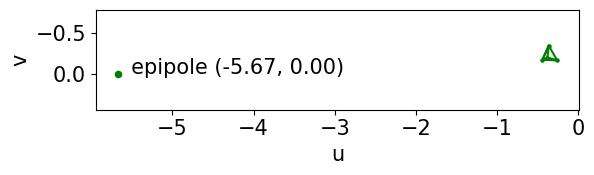

In [33]:
fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(C2_T[:,0]/C2_T[:,2], C2_T[:,1]/C2_T[:,2],c='g',s=5)
#for i,label in enumerate(['A','B','C','D']):
#    ax.annotate(f'{label} ({(C2_T[:,0]/C2_T[:,2])[i][0]:.2f},{(C2_T[:,1]/C2_T[:,2])[i][0]:.2f})', ((C2_T[:,0]/C2_T[:,2])[i],(C2_T[:,1]/C2_T[:,2])[i]))
ax.plot(C2_T[:,0]/C2_T[:,2], C2_T[:,1]/C2_T[:,2],c='g')
ax.plot(C2_T_[:,0]/C2_T_[:,2], C2_T_[:,1]/C2_T_[:,2],c='g')
ax.plot(C2_T__[:,0]/C2_T__[:,2], C2_T__[:,1]/C2_T__[:,2],c='g')
ax.scatter(epipole_2[0]/epipole_2[2], epipole_2[1]/epipole_2[2],c='g',s=20)
ax.annotate(f'  epipole ({epipole_2[0]/epipole_2[2]:.2f}, {epipole_2[1]/epipole_2[2]:.2f})',(epipole_2[0]/epipole_2[2], epipole_2[1]/epipole_2[2]))
ax.invert_yaxis()
ax.axis('equal')
ax.set_xlabel('u')
ax.set_ylabel('v')
plt.tight_layout()
plt.savefig('images/3.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Perform stereo rectification and plot rectified images

In [34]:
alpha = -1 if epipole_2[0] < 0 else 1

In [35]:
alpha*(epipole_2[0]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2))

1.0

In [36]:
R = np.array([
    [alpha*(epipole_2[0]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2)),alpha*(epipole_2[1]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2)),0],
    [-alpha*(epipole_2[1]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2)),alpha*(epipole_2[0]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2)),0],
    [0,0,1]
])

In [37]:
alpha*(epipole_2[1]/np.sqrt(epipole_2[0]**2+epipole_2[1]**2))

-0.0

In [38]:
R

array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [39]:
epipole_2

array([-5.67128182,  0.        ,  1.        ])

In [40]:
G = np.array([
    [1,0,0],
    [0,1,0],
    [-1/epipole_2[0],0,1]
])

In [41]:
G

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.17632698, 0.        , 1.        ]])

In [42]:
H_2 = np.matmul(G, R)

In [43]:
H_2

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.17632698, 0.        , 1.        ]])

In [44]:
C2_T_H2 = np.matmul(H_2,C2_T)
C2_T_H2_ = np.array([C2_T_H2[0],C2_T_H2[2],C2_T_H2[1],C2_T_H2[3]])
C2_T_H2__ = np.array([C2_T_H2[0],C2_T_H2[3],C2_T_H2[2],C2_T_H2[1]])

In [45]:
C2_T_H2

array([[[-1.86824089],
        [-1.        ],
        [ 4.59461749]],

       [[-1.52621633],
        [-1.        ],
        [ 5.59459325]],

       [[-2.51102409],
        [-1.        ],
        [ 5.24729689]],

       [[-1.94343055],
        [-1.866     ],
        [ 5.00778128]]])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(np.round(C2_T_H2[:,0]/C2_T_H2[:,2], decimals=2), np.round(C2_T_H2[:,1]/C2_T_H2[:,2], decimals=2),c='g',s=5)
for i,label in enumerate(['A','B','C','D']):
    ax.annotate(f'{label} ({(C2_T_H2[:,0]/C2_T_H2[:,2])[i][0]:.2f},{(C2_T_H2[:,1]/C2_T_H2[:,2])[i][0]:.2f})', ((C2_T_H2[:,0]/C2_T_H2[:,2])[i],(C2_T_H2[:,1]/C2_T_H2[:,2])[i]))
ax.plot(np.round(C2_T_H2[:,0]/C2_T_H2[:,2], decimals=2),np.round(C2_T_H2[:,1]/C2_T_H2[:,2], decimals=2),c='g')
ax.plot(np.round(C2_T_H2_[:,0]/C2_T_H2_[:,2], decimals=2), np.round(C2_T_H2_[:,1]/C2_T_H2_[:,2], decimals=2),c='g')
ax.plot(np.round(C2_T_H2__[:,0]/C2_T_H2__[:,2], decimals=2), np.round(C2_T_H2__[:,1]/C2_T_H2__[:,2], decimals=2),c='g')
ax.invert_yaxis()
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()

In [46]:
def func(H_1):
    H_1 = H_1.reshape(3,3)
    return np.sum(np.linalg.norm(np.matmul(H_1,C1_T)-np.matmul(H_2,C2_T), axis=1))

In [47]:
res = scipy.optimize.minimize(func,np.array([1,0,0,1,0,0,1,0,0]))

In [48]:
H_1 = res.x.reshape(3,3)

In [49]:
f'{H_1}'

'[[ 9.84807632e-01  7.85420304e-02 -3.30732756e-01]\n [-1.15110885e-07  9.99999860e-01 -4.74013508e-08]\n [ 3.47296416e-01  1.38488765e-02  9.26490602e-01]]'

In [50]:
C1_T_H1 = np.matmul(H_1,C1_T)
C1_T_H1_ = np.array([C1_T_H1[0],C1_T_H1[2],C1_T_H1[1],C1_T_H1[3]])
C1_T_H1__ = np.array([C1_T_H1[0],C1_T_H1[3],C1_T_H1[2],C1_T_H1[1]])

fig, ax = plt.subplots()
ax.scatter(np.round(C1_T_H1[:,0]/C1_T_H1[:,2], decimals=2), np.round(C1_T_H1[:,1]/C1_T_H1[:,2], decimals=2),c='b',s=5)
for i,label in enumerate(['A','B','C','D']):
    ax.annotate(f'{label} ({(C1_T_H1[:,0]/C1_T_H1[:,2])[i][0]:.2f},{(C1_T_H1[:,1]/C1_T_H1[:,2])[i][0]:.2f})', ((C1_T_H1[:,0]/C1_T_H1[:,2])[i],(C1_T_H1[:,1]/C1_T_H1[:,2])[i]))
ax.plot(np.round(C1_T_H1[:,0]/C1_T_H1[:,2], decimals=2),np.round(C1_T_H1[:,1]/C1_T_H1[:,2], decimals=2),c='b')
ax.plot(np.round(C1_T_H1_[:,0]/C1_T_H1_[:,2], decimals=2), np.round(C1_T_H1_[:,1]/C1_T_H1_[:,2], decimals=2),c='b')
ax.plot(np.round(C1_T_H1__[:,0]/C1_T_H1__[:,2], decimals=2), np.round(C1_T_H1__[:,1]/C1_T_H1__[:,2], decimals=2),c='b')
ax.invert_yaxis()
ax.axis('equal')

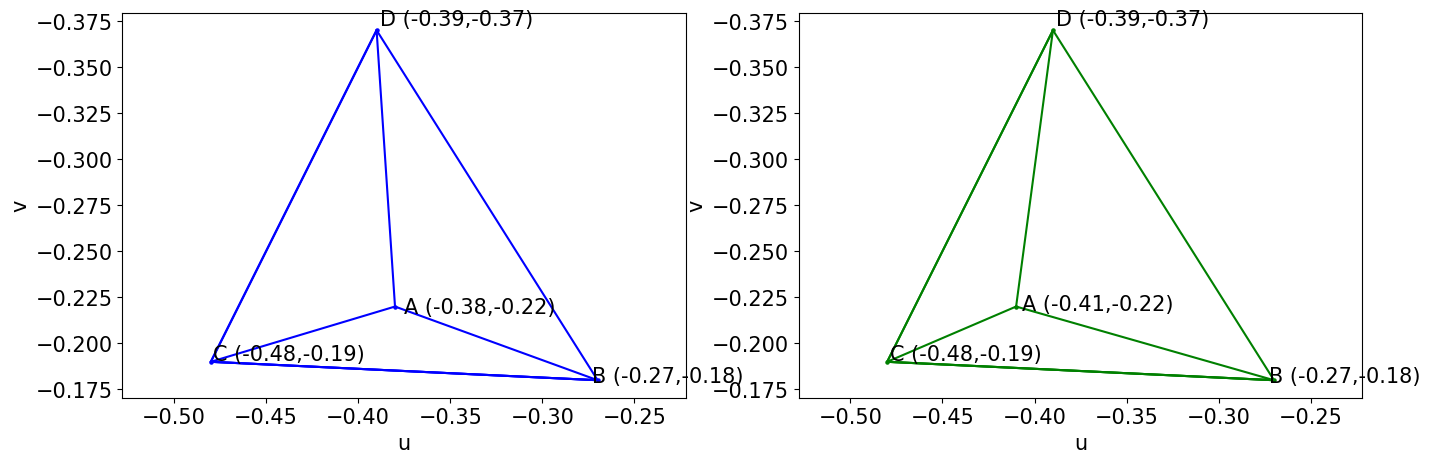

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
axs[0].scatter(np.round(C1_T_H1[:,0]/C1_T_H1[:,2], decimals=2), np.round(C1_T_H1[:,1]/C1_T_H1[:,2], decimals=2),c='b',s=5)
for i,label in enumerate(['A','B','C','D']):
    axs[0].annotate(f'{label} ({(C1_T_H1[:,0]/C1_T_H1[:,2])[i][0]:.2f},{(C1_T_H1[:,1]/C1_T_H1[:,2])[i][0]:.2f})', ((C1_T_H1[:,0]/C1_T_H1[:,2])[i],(C1_T_H1[:,1]/C1_T_H1[:,2])[i]))
axs[0].plot(np.round(C1_T_H1[:,0]/C1_T_H1[:,2], decimals=2),np.round(C1_T_H1[:,1]/C1_T_H1[:,2], decimals=2),c='b')
axs[0].plot(np.round(C1_T_H1_[:,0]/C1_T_H1_[:,2], decimals=2), np.round(C1_T_H1_[:,1]/C1_T_H1_[:,2], decimals=2),c='b')
axs[0].plot(np.round(C1_T_H1__[:,0]/C1_T_H1__[:,2], decimals=2), np.round(C1_T_H1__[:,1]/C1_T_H1__[:,2], decimals=2),c='b')
axs[0].invert_yaxis()
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].axis('equal')

axs[1].scatter(np.round(C2_T_H2[:,0]/C2_T_H2[:,2], decimals=2), np.round(C2_T_H2[:,1]/C2_T_H2[:,2], decimals=2),c='g',s=5)
for i,label in enumerate(['A','B','C','D']):
    axs[1].annotate(f'{label} ({(C2_T_H2[:,0]/C2_T_H2[:,2])[i][0]:.2f},{(C2_T_H2[:,1]/C2_T_H2[:,2])[i][0]:.2f})', ((C2_T_H2[:,0]/C2_T_H2[:,2])[i],(C2_T_H2[:,1]/C2_T_H2[:,2])[i]))
axs[1].plot(np.round(C2_T_H2[:,0]/C2_T_H2[:,2], decimals=2),np.round(C2_T_H2[:,1]/C2_T_H2[:,2], decimals=2),c='g')
axs[1].plot(np.round(C2_T_H2_[:,0]/C2_T_H2_[:,2], decimals=2), np.round(C2_T_H2_[:,1]/C2_T_H2_[:,2], decimals=2),c='g')
axs[1].plot(np.round(C2_T_H2__[:,0]/C2_T_H2__[:,2], decimals=2), np.round(C2_T_H2__[:,1]/C2_T_H2__[:,2], decimals=2),c='g')
axs[1].invert_yaxis()
axs[1].axis('equal')
axs[1].set_xlabel('u')
axs[1].set_ylabel('v')
plt.savefig('images/4.pdf', format='pdf', dpi=1000, bbox_inches='tight')